# Business Data Analytics
## Solutions for Homework 1 and Practice Session 1

**Author:** Kamran Mammadzada

The notebook contains solutions for Homework 1 and Practice Session 1 in Business Data Analytics (BDA) Course taught by Rajesh Sharma - University of Tartu.

Original Author of the homework questions - Anna Leontjeva.

In [6]:
# knitr options
knitr::opts_chunk$set(echo = TRUE)

# load libraries
library(tidyverse)
library(data.table)
library(lubridate) # lubridate used to convert char to datetime

dt <- fread("intro_dataset.csv") # load dataset

## Exercise 1 (1pt)

In [10]:
dt %>%
    group_by(country) %>%
    filter(p1prom == 1) %>%
    summarise(counts = n())

country,counts
AU,18
BR,25
CN,25
DE,50
GB,22
JP,41
US,27


In [12]:
dt %>%
    group_by(country) %>%
    select(contains("p")) %>%
    filter(p1prom == 1 & p2prom == 1) %>%
    summarise_all(funs(mean, sd), na.rm=TRUE)

Adding missing grouping variables: `country`


country,p1sales_mean,p2sales_mean,p1price_mean,p2price_mean,p1prom_mean,p2prom_mean,p1sales_sd,p2sales_sd,p1price_sd,p2price_sd,p1prom_sd,p2prom_sd
AU,162.0000,133.3333,2.590000,2.723333,1,1,51.15662,35.64174,0.3464102,0.2309401,0,0
BR,159.8000,149.0000,2.610000,2.590000,1,1,15.78607,13.72953,0.1643168,0.2549510,0,0
CN,182.7500,126.0000,2.365000,2.690000,1,1,34.17967,25.96151,0.2872281,0.3559026,0,0
DE,162.7143,139.2857,2.675714,2.704286,1,1,52.16229,36.85880,0.3484660,0.4598136,0,0
GB,159.0000,139.3333,2.790000,2.756667,1,1,36.86462,19.85783,0.0000000,0.3785939,0,0
JP,173.6000,119.2000,2.470000,2.670000,1,1,33.61250,18.30847,0.2949576,0.3114482,0,0
US,164.6000,126.8000,2.490000,2.610000,1,1,29.53473,19.71548,0.3741657,0.3420526,0,0


> Firstly, try to explain what these chunks of code do, run it and check whether you were right. Explain each line of the code in the report.

1st piece of code - the following logics is used in the code:

1. we use dt dataframe
2. we group the dt dataframe by country
3. we filter only rows where the 1st product promotion took place
4. then we summarise the number of records based on the above condition
5. in the end we get the number of promotions of 1st product by country

2nd piece of code - the following logic is used in the code:

1. we use dt dataframe
2. we select all rows that contain p in their value
3. then we filter rows where product 1 promotion took place and where product 2 promotion took place as well
4. then we summarise all data with each new column representing mean and standard deviation of each feature, and this of course is grouped by country
5. in final dataset we have mean & sd for each feature in the dataset grouped by countries

## Exercise 2 (1p)

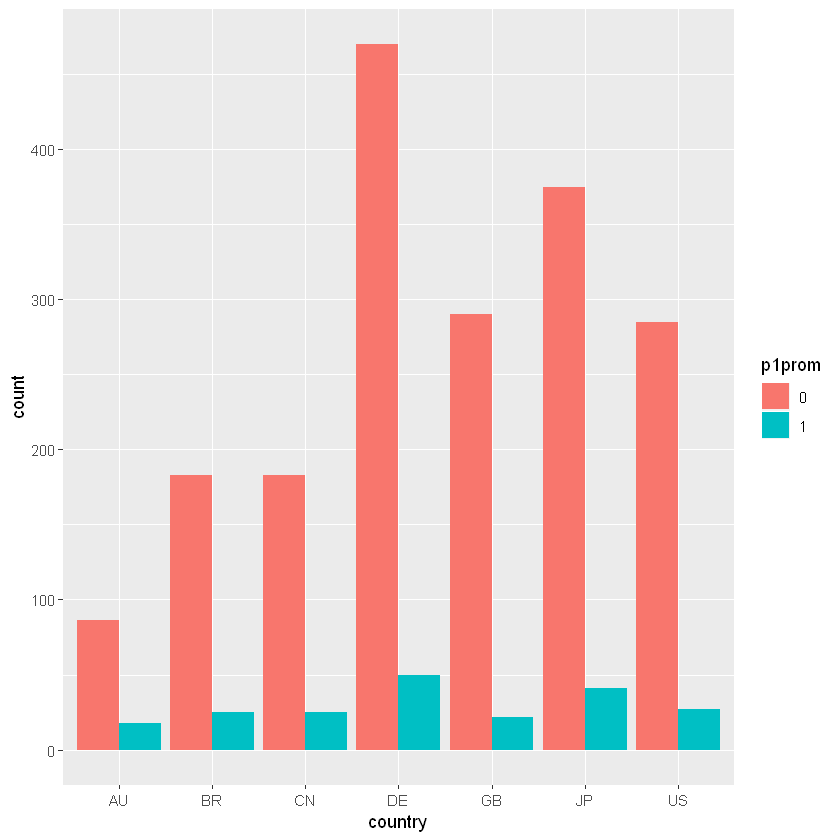

In [13]:
dt %>%
    mutate(p1prom = as.factor(p1prom)) %>%
        ggplot() +
            geom_bar(mapping=aes(x=country, fill=p1prom), position='dodge')

> How do you interpret this plot? Try to customize it by changing colors (check help for scale_fill_manual())

**Answer:**

The plot takes on the values of first product's promotion which are 0 and 1, and treats them as if they are categories - product 1 promotion took place, product 1 promotion did not take place. Then the plot visualizes in pairs of 2 for each country. The plot allows us to see the number of promotions and non-promotions for product 1 for each country just within one plot. It seems that majority of product 1 for each country was sold with no promotion.

Customized colors

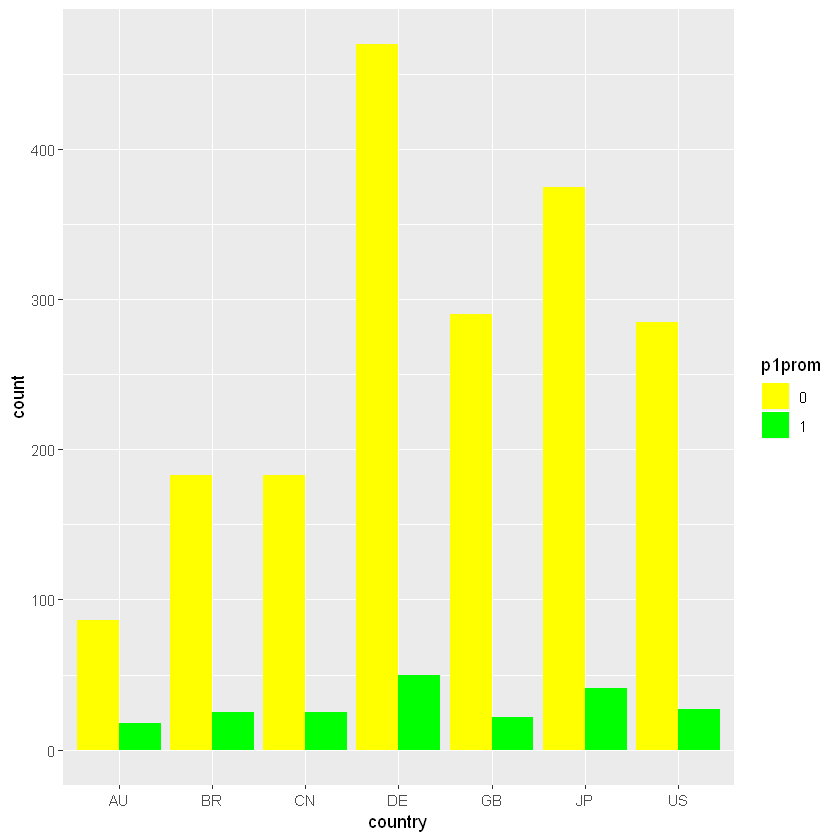

In [14]:
dt %>%
    mutate(p1prom = as.factor(p1prom)) %>%
    ggplot() +
        geom_bar(mapping=aes(x=country, fill=p1prom), position='dodge') +
        scale_fill_manual(values=c("yellow", "green"))

## Exercise 3 (1p)

> Try to change ```geom_boxplot``` to ```geom_violin```. Can you explain what is the difference? Use help to check (type ?geom_violin). How you change the code to draw the median on a violin plot?

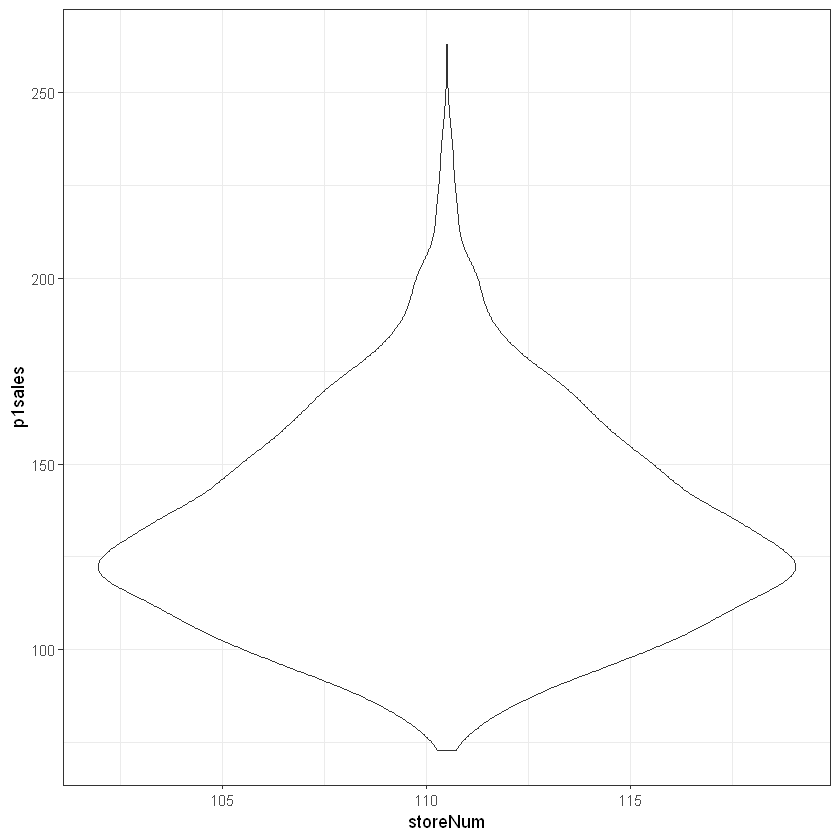

In [15]:
ggplot(data = dt, mapping = aes(x = storeNum, y = p1sales)) +
  geom_violin() + theme_bw()

The different between ```geom_boxplot``` and ```geom_violin``` is that ```geom_violin``` also display the distribution of each value (in our case the distribution of sales of product 1 for each store number). ```geom_violin``` provides quantiles but its hard to read compared to ```geom_boxplot```

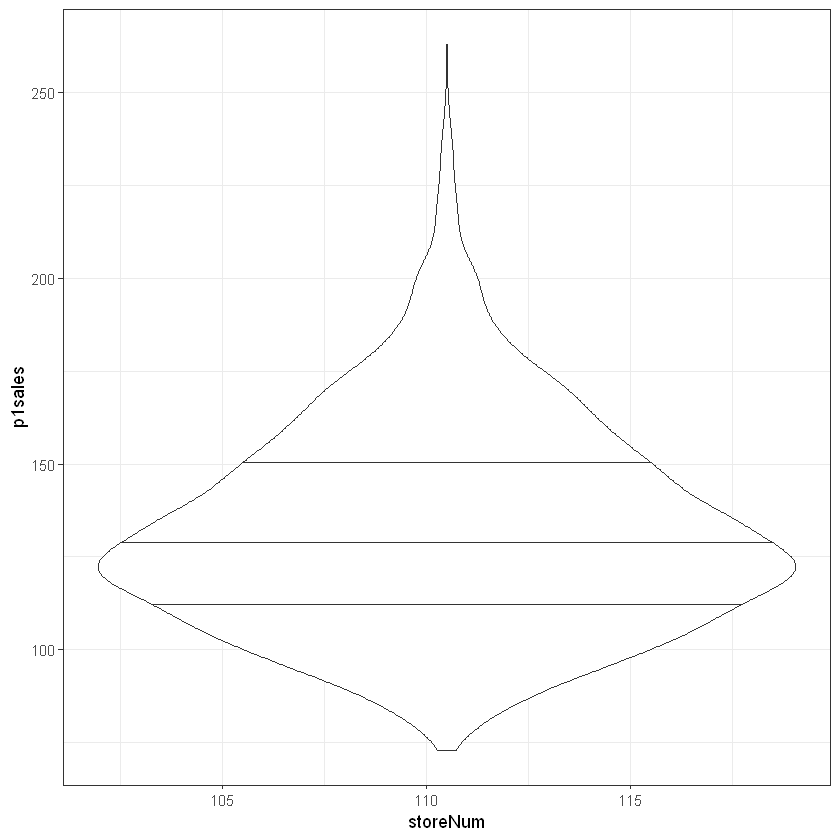

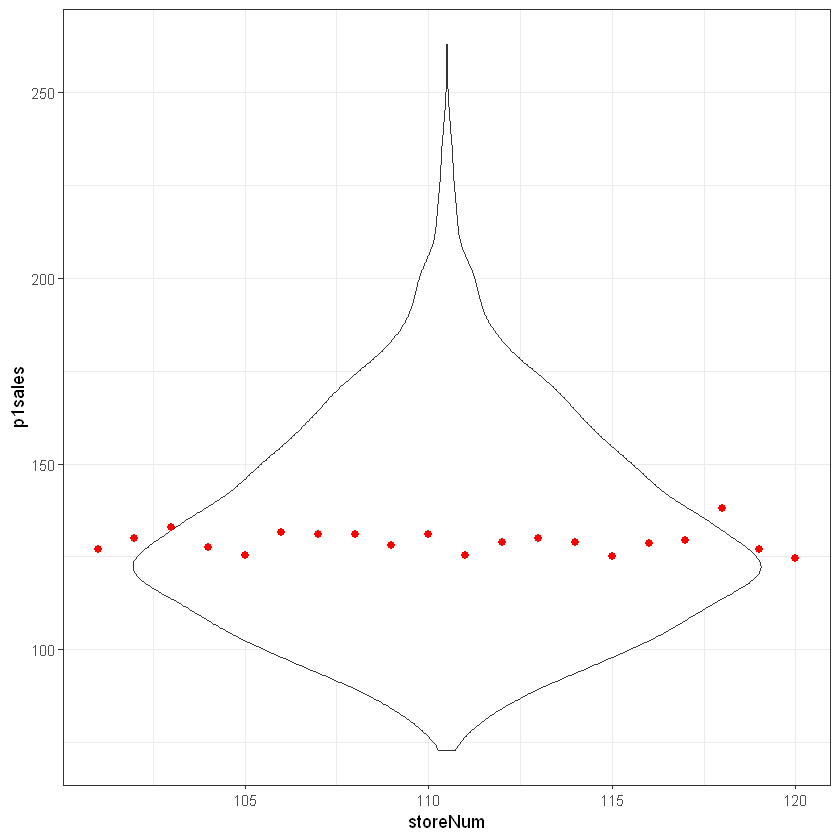

In [16]:
ggplot(data = dt, mapping = aes(x = storeNum, y = p1sales)) +
  geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
  theme_bw()

# second option using stat_summary
ggplot(data = dt, mapping = aes(x = storeNum, y = p1sales)) +
  geom_violin() + 
  stat_summary(fun.y = median, geom = "point", size=2, color="red") +
  theme_bw()

## Exercise 4 (1p)

> Often line charts are “misused”. Look at the following graph and explain what is wrong with it:

In [ ]:
dt %>%
    group_by(country) %>%
    summarise(p1sales=sum(p1sales)) %>%
    ggplot(aes(x=country, y=p1sales, group=1)) + geom_line() + theme_bw()

**Answer**:

The line chart gives an impression of increasing and decreasing number of sales across countries. But in reality its just the total number of sales for each country visualized in a continuous manner, thus confusing the user. Here bar chart would be most fit to show

## Exercise 5 (1p)

> Comment what each line of the code does. Play with the code to investigate it. Submit one of the modifed solutions.

Answer:
The code uses the following logic path:

1. We take the dt dataset
2. We filter only the records for Store Number 101
3. We create a new variable called Week from existing Week but with adding a 0 to the left of it
4. We create a new variable Time which uses our newly created Week and existing Year and combines them together with a '-' separator producing something like 1-01
5. Now we visualizes using ggplot
6. We create a line chart with Time on the x-axis and product 1 sales on y axis
7. By using theme we adjust the text on x axis to have a 70 degree angle for more or less better readability
8. And last using geom_smooth we add a red trend line which has grey area as 95% confidence level predictions since geom_smooth uses logess regression  to fit the a curve through the set of points

Modified version

I have only taken sales for store number 102 for second year for product number 2

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


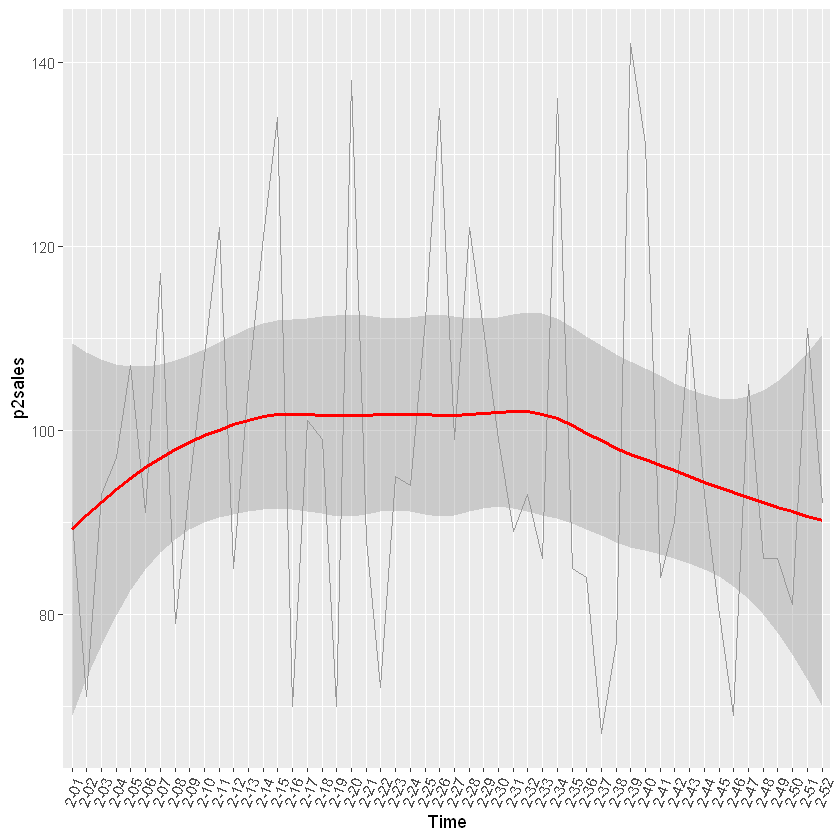

In [18]:
dt %>%
    filter(storeNum=='102' & Year==2) %>%
    mutate(Week = str_pad(Week, width=2, side='left', pad='0')) %>%
    mutate(Time = paste(Year, Week, sep='-')) %>%
    ggplot() + geom_line(aes(x=Time, y=p2sales, group=1), color='grey60') +
    theme(axis.text.x = element_text(angle = 70, hjust = 1)) + 
    geom_smooth(aes(x=Time, y=p2sales, group=1), color='red')

## Exercise 6 (1pt)

> Let’s interpret those graphs. What types of relationships can we observe between variable x and y?

There are three scatter plots presented in the above section of the homework file

1. x and y have a linear relationship with a positive correlation. As x increases y increases as well
2. x and y have no correlationship, data is simply scattered in a spherical format.
3. x and y have an exponential relationship. for smaller x changes there is significantly more  or exponential change in y

## Exercise 7 (1pt)

> Make a scatterplot using sales data. What patterns do you observe?

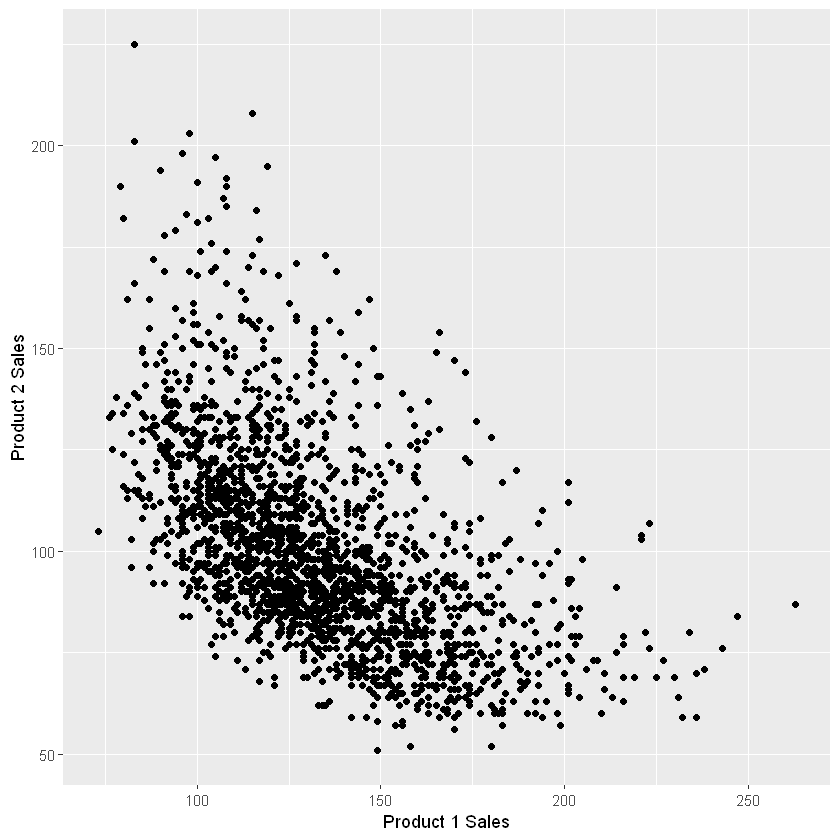

In [17]:
# product 1 & product 2 sales
ggplot(dt) +
    geom_point(aes(x=p1sales, y=p2sales)) +
    labs(x="Product 1 Sales", y="Product 2 Sales")

The above graph shows the relationship between sales of product 1 and sales of product 2. We can observe that there is a negative correlation, since more of product 1 sales is associated with less of sales for product 2. We can check this using Pearson correlation coefficient

In [19]:
cor(dt$p1sales, dt$p2sales) # p1sales & p2sales correlation coefficient

[1] -0.5583594

The negative coefficient supports our claim

## Exercise 8 (1pt)

> Now, come up with a question about this dataset that would be interesting and use any of the descriptive tools to find an answer.

Based on the dataset I got curious about the following questions:

1. What are the top 5 stores in overall sales?

Selecting by total_sales


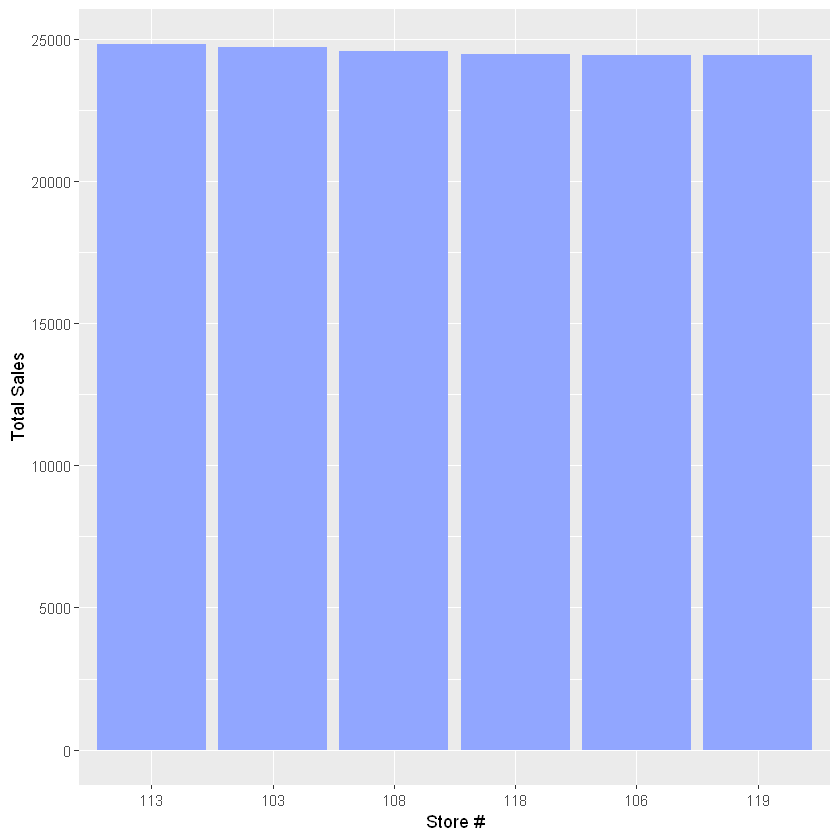

In [21]:
dt %>%
    group_by(storeNum) %>%
    summarise(total_sales = sum(p1sales) + sum(p2sales)) %>%
    arrange(desc(total_sales)) %>%
    top_n(5) %>%
    ggplot(aes(x=reorder(storeNum, -total_sales), y=total_sales)) +
    geom_bar(stat = "identity", fill = "#91A6FF") +
    labs(x = "Store #", y = "Total Sales")

2. What are the product 1 sales indicators of stores in US during the first quarter of Year 1?

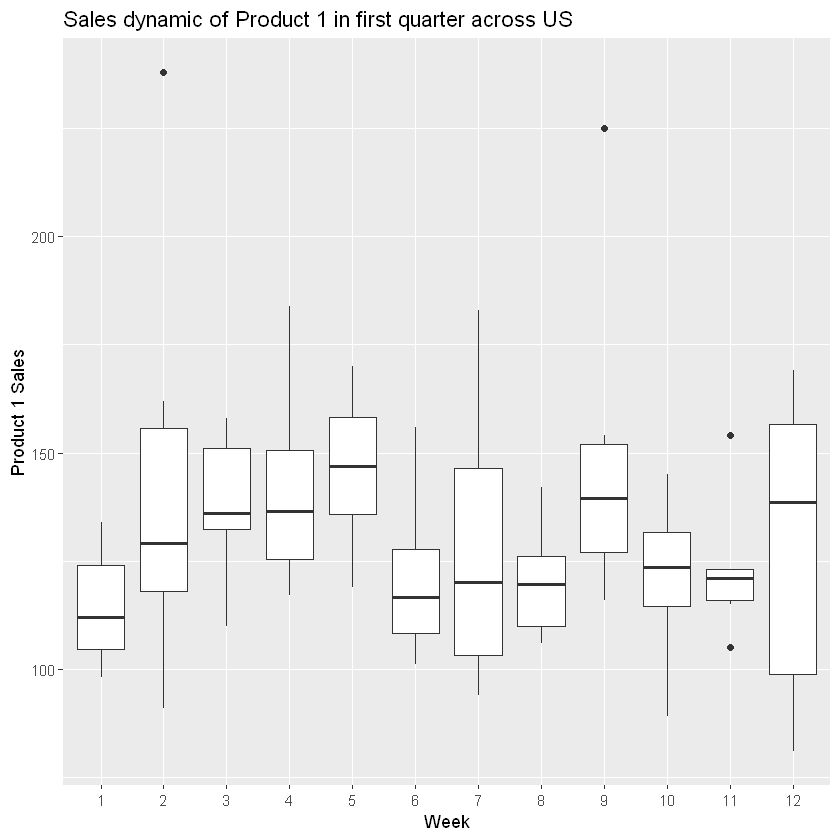

In [22]:
dt %>%
  filter(country == "US" & Week %in% c(1:12)) %>%
  ggplot(aes(x = factor(Week))) +
    geom_boxplot(aes(y=p1sales)) +
    labs(title="Sales dynamic of Product 1 in first quarter across US",
         x="Week", y="Product 1 Sales")

Based on the above, 1st, 6th, 8th and 11th weeks during 1st quarter were not the best performing for product 1

3. What is the correlation of sales of product 1 and product 2 with color indicating country?

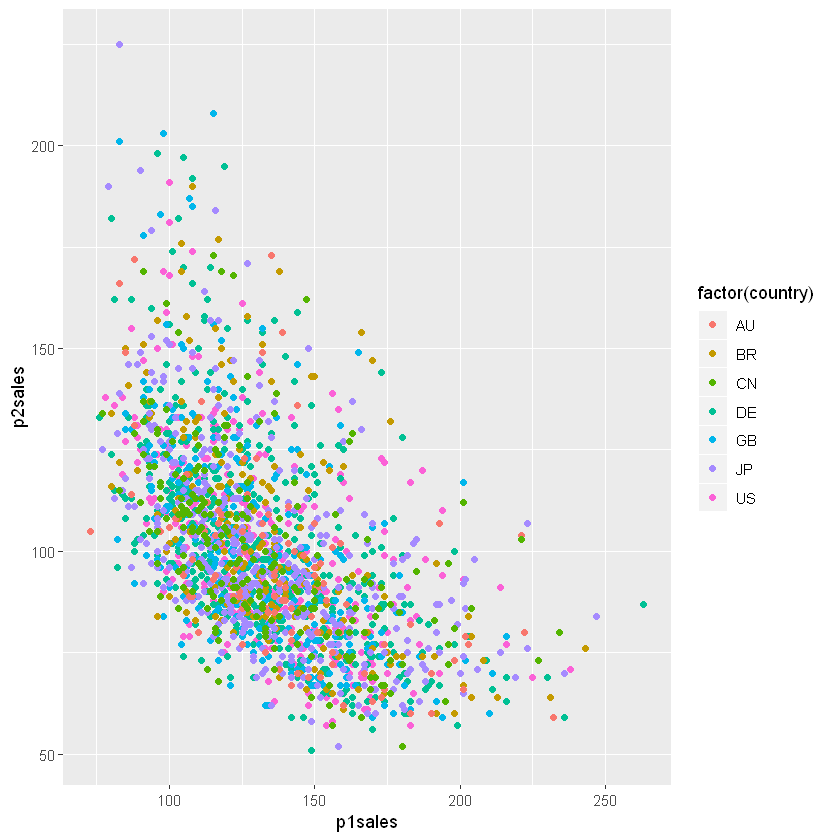

In [23]:
ggplot(dt) +
  geom_point(aes(x=p1sales, y=p2sales, color=factor(country)))

## Exercise 9 (2pt)

> Load the data bank_accounts.csv, which corresponds to three customers and their bank account statements of the first day of each month. Perform an explorative analysis of the data (you are free to choose types of plots and calculated measures, but they should make sense). Describe the results.

### Load Data & Summarize

First let's load the dataset

In [24]:
accounts <- fread("bank_accounts.csv")

Check if data types are correct

In [25]:
str(accounts)

Classes 'data.table' and 'data.frame':	120 obs. of  4 variables:
 $ time     : chr  "2007-09-01" "2007-10-01" "2007-11-01" "2007-12-01" ...
 $ account_a: num  8108 8021 8000 7905 8342 ...
 $ account_b: num  4897 4897 4897 4894 4893 ...
 $ account_c: num  427 871 1027 696 896 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Convert time to datetime

In [26]:
accounts$time <- as.Date(accounts$time)
str(accounts) # check if time is Date now

Classes 'data.table' and 'data.frame':	120 obs. of  4 variables:
 $ time     : Date, format: "2007-09-01" "2007-10-01" ...
 $ account_a: num  8108 8021 8000 7905 8342 ...
 $ account_b: num  4897 4897 4897 4894 4893 ...
 $ account_c: num  427 871 1027 696 896 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Show summary statistics

In [27]:
summary(accounts)

      time              account_a      account_b      account_c     
 Min.   :2007-09-01   Min.   :   0   Min.   :4873   Min.   : 217.9  
 1st Qu.:2010-02-22   1st Qu.:3992   1st Qu.:5225   1st Qu.: 520.8  
 Median :2012-08-16   Median :4969   Median :6368   Median : 701.4  
 Mean   :2012-08-15   Mean   :4995   Mean   :6399   Mean   : 726.7  
 3rd Qu.:2015-02-08   3rd Qu.:6991   3rd Qu.:7456   3rd Qu.: 979.4  
 Max.   :2017-08-01   Max.   :8342   Max.   :8418   Max.   :1179.1  

Based on summary stats it seems that transactions amounts between customer a and b are more or less similar while customer c has different spending dynamics.

### Data Preprocessing

Before we move on with analysing and visualizing, we will tidy the data (use gather), to include accounts as row values

In [28]:
acc <- accounts %>%
    gather(account_a, account_b, account_c, key = "account", value="amount") # gather data

# rename accounts for easier reading
acc$account[acc$account =="account_a"] <- "a"
acc$account[acc$account =="account_b"] <- "b"
acc$account[acc$account =="account_c"] <- "c"

unique(acc$account) # check if values changed

[1] "a" "b" "c"

Next, to enable use more granular analysis, we will divide the date column into day, month, year

In [29]:
df <- acc %>%
    mutate(year = as.integer(format(time, format = "%Y")),
        month = as.integer(format(time, format = "%m")),
        day = as.integer(format(time, format = "%d"))) %>%
    select(time, year, month, day, account, amount)

### Data Visualization & Analysis

It would be good to understand each customers earning and spending pattern based on their account balance. We will visualize each customers balances over time

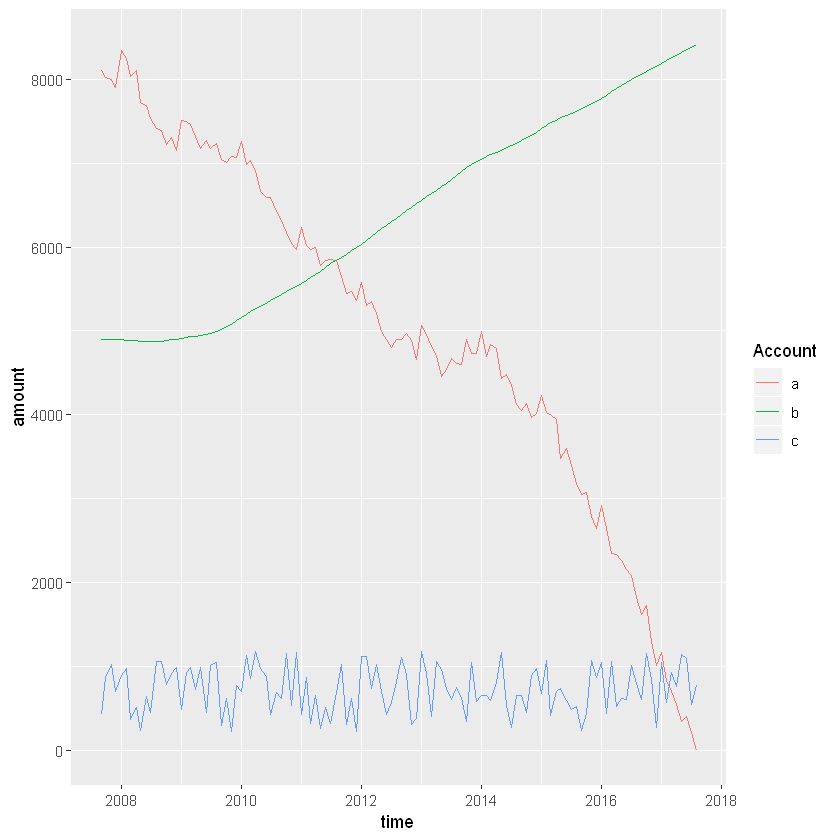

In [30]:
ggplot(df, aes(x=time, y=amount)) +
    geom_line(aes(color=account)) + 
    scale_color_discrete(name="Account", labels=c("a", "b", "c"))

Based on the above graph it seems that customer a's balance has been going down and possibly the customer has closed or stopped using the account since last balance amount 0

In [31]:
# check customer a's 5 last transactions
df %>%
    filter(account=="a") %>%
    arrange(time) %>%
    select(time, account, amount) %>%
    tail(5)

,time,account,amount
116,2017-04-01,a,545.5007
117,2017-05-01,a,340.2164
118,2017-06-01,a,406.3788
119,2017-07-01,a,206.8893
120,2017-08-01,a,0.0000


Customer b's balance has been increasing over time and potentially this is a savings or deposit account for him/her.
Customer c seems to actively use their balance on daily basis, assumption is that this account is used for monthly salary or some sort of budget.

Next, it is would be interesting to see the final balance across three acounts by the end of each year. We will assume that the year ends by 01-01, thus balances for those dates are taken into account

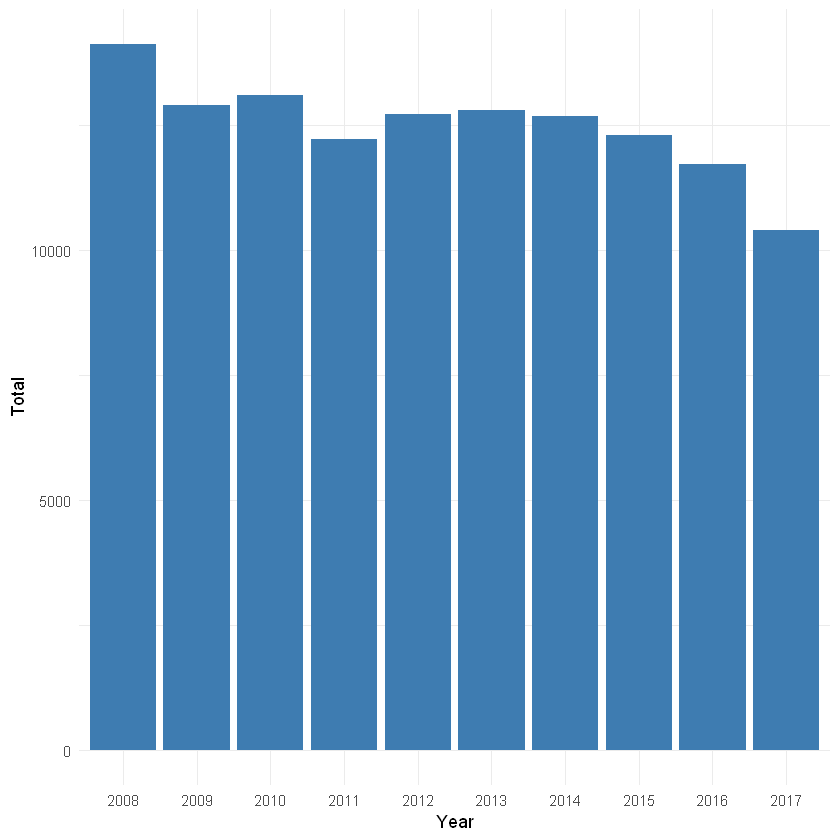

In [32]:
df %>%
    filter(month == 1, day == 1) %>%
    group_by(year) %>%
    summarise(total = sum(amount)) %>%
    ggplot(aes(x=factor(year), y=total)) +
        geom_bar(stat = "identity", fill="#3E7CB1") +
        theme_minimal() +
        labs(x="Year", y="Total")

According to the graph, overall balance of all accounts has been gradually decreasing during the past almost 10 years (2008-2017).

Next, customer c had a pretty dynamic balance, which seems to change quite often. It would be interesting to visualize the relationship of the balance status with the months.

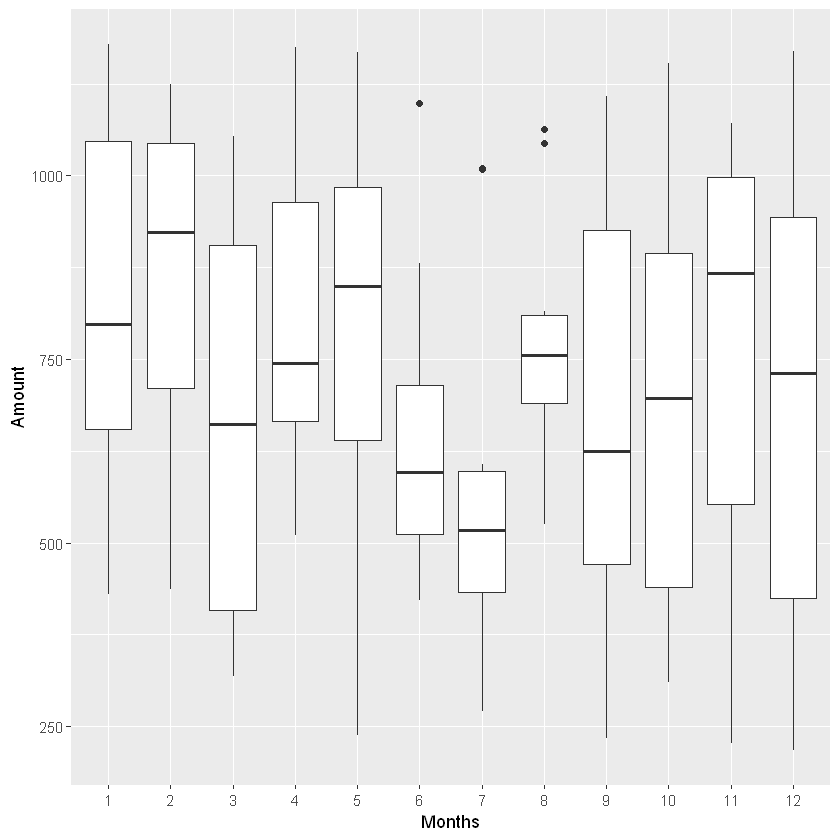

In [33]:
df %>%
    filter(account == "c") %>%
    select(month, account, amount) %>%
    group_by(month) %>%
    ggplot(aes(x=factor(month), y=amount)) +
        geom_boxplot() +
        labs(x="Months", y="Amount")

The above box plot shows the average, median and quartiles of the balance of a customer throughout 10 years. Judging from the size of the boxes the largest variation of balance is in March and in the last quarter of the year. This maybe due to certain spendings associated with holidays or some other reason (just assumptions)
During summer, the balance variations (interquartile range) seem to be small with some outliers.